In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the directories for the training and validation datasets
train_dir = 'Dataset/train'
val_dir = 'Dataset/test'

In [3]:
# Set the parameters for the image preprocessing
img_width, img_height = 224, 224
batch_size = 32

In [4]:
# Create data generators to preprocess the images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 375 images belonging to 35 classes.


In [6]:
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_width, img_height),
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 109 images belonging to 35 classes.


In [7]:
# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(35, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 100
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator)

Epoch 1/100
12/12 [==============================] - 27s 2s/step - loss: 3.9021 - accuracy: 0.0187 - val_loss: 3.5473 - val_accuracy: 0.0642
Epoch 2/100
12/12 [==============================] - 24s 2s/step - loss: 3.5347 - accuracy: 0.0507 - val_loss: 3.5084 - val_accuracy: 0.0275
Epoch 3/100
12/12 [==============================] - 23s 2s/step - loss: 3.4580 - accuracy: 0.0320 - val_loss: 3.2920 - val_accuracy: 0.0550
Epoch 4/100
12/12 [==============================] - 25s 2s/step - loss: 3.2972 - accuracy: 0.0667 - val_loss: 3.0816 - val_accuracy: 0.1284
Epoch 5/100
12/12 [==============================] - 23s 2s/step - loss: 3.0702 - accuracy: 0.1547 - val_loss: 2.7676 - val_accuracy: 0.2661
Epoch 6/100
12/12 [==============================] - 23s 2s/step - loss: 2.8256 - accuracy: 0.1947 - val_loss: 2.4997 - val_accuracy: 0.2936
Epoch 7/100
12/12 [==============================] - 24s 2s/step - loss: 2.5660 - accuracy: 0.3013 - val_loss: 2.1967 - val_accuracy: 0.4220
Epoch 8/100
1

In [ ]:
# Save the trained model
model.save('Mediterranean.h5')

In [12]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [13]:
epochs_range = range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

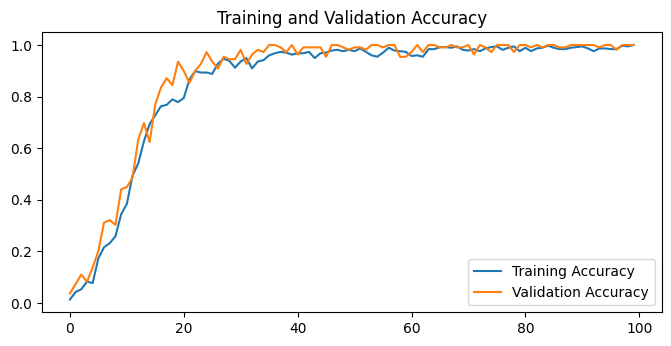

In [14]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

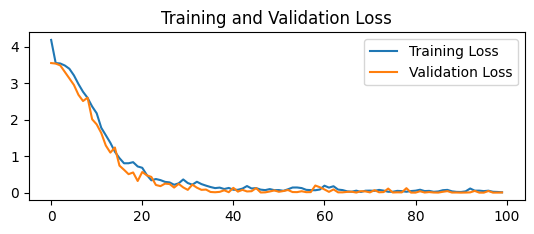

In [15]:
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

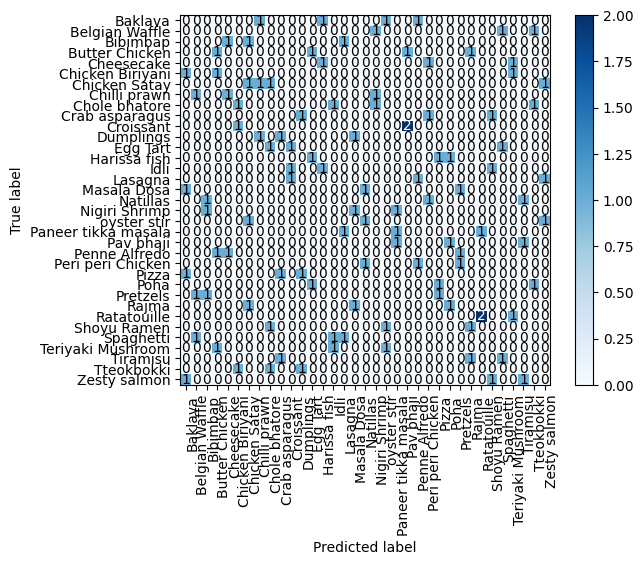

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# Generate predictions and compute the confusion matrix
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_generator.classes, y_pred)

# Define class labels
class_names = ['Baklava', 'Belgian Waffle', 'Bibimbap', 'Butter Chicken', 'Cheesecake', 'Chicken Biriyani', 
    'Chicken Satay', 'Chilli prawn', 'Chole bhatore', 'Crab asparagus', 'Croissant', 'Dumplings', 
    'Egg Tart', 'Harissa fish', 'Idli', 'Lasagna', 'Masala Dosa', 'Natillas', 'Nigiri Shrimp', 'oyster stir', 'Paneer tikka masala', 'Pav bhaji', 'Penne Alfredo', 'Peri peri Chicken', 
    'Pizza', 'Poha', 'Pretzels', 'Rajma', 'Ratatouille', 'Shoyu Ramen', 'Spaghetti', 
    'Teriyaki Mushroom', 'Tiramisu', 'Tteokbokki', 'Zesty salmon']


# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# Set the x-axis and y-axis labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label')
# Rotate the x-axis labels to vertical orientation
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
# Loop over the data and annotate each cell with its value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
# Add a title to the plot
#ax.set_title("Confusion matrix")
#fig.tight_layout()
plt.show()


In [21]:
# Get the accuracy from the history object
accuracy = history.history['accuracy'][-1]

# Print the accuracy to the console
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%
